In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('data/data_filled.csv')

In [3]:
df

,title,director_name,production_companies,actor_1_name,actor_2_name,actor_3_name,duration,genres,language,country,budget,revenue,year
0,avatar,James Cameron,Dune Entertainment Lightstorm Entertainment 20...,CCH Pounder,Joel David Moore,Wes Studi,178.0,Action Adventure Fantasy Sci-Fi,English,United States of America,237000000.0,2.923706e+09,2009.0
1,pirates of the caribbean: at world's end,Gore Verbinski,Jerry Bruckheimer Films Second Mate Production...,Johnny Depp,Orlando Bloom,Jack Davenport,169.0,Action Adventure Fantasy,English,United States of America,300000000.0,9.610000e+08,2007.0
2,spectre,Sam Mendes,Metro-Goldwyn-Mayer Columbia Pictures EON Prod...,Christoph Waltz,Rory Kinnear,Stephanie Sigman,148.0,Action Adventure Thriller,English,United Kingdom,245000000.0,8.806746e+08,2015.0
3,the dark knight rises,Christopher Nolan,Syncopy Legendary Pictures DC Entertainment Wa...,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,164.0,Action Thriller,English,United States of America,250000000.0,1.081041e+09,2012.0
4,star wars: episode vii - the force awakens ...,Doug Walker,Lucasfilm Ltd. Bad Robot,Doug Walker,Rob Walker,Carrie Fisher,136.0,Documentary,English,United States of America,245000000.0,2.068224e+09,2015.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
47912,robin hood,John Irvin,Westdeutscher Rundfunk (WDR) Working Title Fil...,Patrick Bergin,Uma Thurman,David Morrissey,104.0,Drama Action Romance,English,Canada Germany United Kingdom United States of...,200000000.0,3.216697e+08,1991.0
47913,subdue,Hamid Nematollah,unknown,Leila Hatami,Kourosh Tahami,Elham Korda,90.0,Drama Family,فارسی,Iran,0.0,0.000000e+00,1971.0
47914,century of birthing,Lav Diaz,Sine Olivia,Angel Aquino,Perry Dizon,Hazel Orencio,360.0,Drama,tl,Philippines,0.0,0.000000e+00,2011.0
47915,betrayal,Mark L. Lester,American World Pictures,Erika Eleniak,Adam Baldwin,Julie du Page,90.0,Action Drama Thriller,English,United States of America,0.0,0.000000e+00,2003.0


In [4]:
from tmdbv3api import TMDb
import json
import requests
tmdb = TMDb()
tmdb.api_key = '07cc151730daa91e60bd8a7ad5ca9986'

In [5]:
from tmdbv3api import Movie
tmdb_movie = Movie()
class Get_data:
    
    def genre(x):
        genres = []
        result = tmdb_movie.search(x)
        if not result.results:
            return np.NaN
        movie_id = result[0].id
        response = requests.get(f'https://api.themoviedb.org/3/movie/{movie_id}?api_key={tmdb.api_key}')
        data_json = response.json()
        if data_json['genres']:
            genre_str = " "
            for i in range(0,len(data_json['genres'])):
                genres.append(data_json['genres'][i]['name'])
            return genre_str.join(genres)
        else:
            return np.NaN

    def production_companies(x):
        production_companies = []
        result = tmdb_movie.search(x)
        if not result.results:
            return np.NaN
        movie_id = result[0].id
        response = requests.get(f'https://api.themoviedb.org/3/movie/{movie_id}?api_key={tmdb.api_key}')
        data_json = response.json()
        if data_json['production_companies']:
            genre_str = " " 
            for i in range(0,len(data_json['production_companies'])):
                production_companies.append(data_json['production_companies'][i]['name'])
            return genre_str.join(production_companies)
        else:
            return np.NaN

    def country(x):
        production_countries = []
        result = tmdb_movie.search(x)
        if not result.results:
            return np.NaN
        movie_id = result[0].id
        response = requests.get(f'https://api.themoviedb.org/3/movie/{movie_id}?api_key={tmdb.api_key}')
        data_json = response.json()
        if data_json['production_countries']:
            genre_str = " " 
            for i in range(0,len(data_json['production_countries'])):
                production_countries.append(data_json['production_countries'][i]['name'])
            return genre_str.join(production_countries)
        else:
            return np.NaN
    
    def language(x):
        spoken_languages = []
        result = tmdb_movie.search(x)
        if not result.results:
            return np.NaN
        movie_id = result[0].id
        response = requests.get(f'https://api.themoviedb.org/3/movie/{movie_id}?api_key={tmdb.api_key}')
        data_json = response.json()
        if data_json['original_language']:
            return data_json['original_language']
        else:
            return np.NaN

    def year(x):
        result = tmdb_movie.search(x)
        if not result.results:
            return np.NaN
        movie_id = result[0].id
        response = requests.get(f'https://api.themoviedb.org/3/movie/{movie_id}?api_key={tmdb.api_key}')
        data_json = response.json()
        if data_json['release_date']:
            return int(data_json['release_date'].split('-')[0])
        else:
            return np.NaN

    def budget(x):
        result = tmdb_movie.search(x)
        if not result.results:
            return np.NaN
        movie_id = result[0].id
        response = requests.get(f'https://api.themoviedb.org/3/movie/{movie_id}?api_key={tmdb.api_key}')
        data_json = response.json()
        try:
            if data_json['budget']:
                return data_json['budget']
            else:
                return np.NaN
        except:
            return np.NaN

    def revenue(x):
        result = tmdb_movie.search(x)
        if not result.results:
            return np.NaN
        movie_id = result[0].id
        response = requests.get(f'https://api.themoviedb.org/3/movie/{movie_id}?api_key={tmdb.api_key}')
        data_json = response.json()
        try:
            if data_json['revenue']:
                return data_json['revenue']
            else:
                return np.NaN
        except:
            return np.NaN

    def duration(x):
        result = tmdb_movie.search(x)
        if not result.results:
            return np.NaN
        movie_id = result[0].id
        response = requests.get(f'https://api.themoviedb.org/3/movie/{movie_id}?api_key={tmdb.api_key}')
        data_json = response.json()
        if data_json['runtime']:
            return data_json['runtime']
        else:
            return np.NaN

    def director_name(x):
        result = tmdb_movie.search(x)
        if not result.results:
            return np.NaN
        movie_id = result[0].id
        response = requests.get(f'https://api.themoviedb.org/3/movie/{movie_id}/credits?api_key={tmdb.api_key}')
        data_json = response.json()
        if data_json['crew']:
            if data_json['crew']:
                for i in range(0, len(data_json['crew'])):
                    if data_json['crew'][i]['job'] == 'Director':
                        return data_json['crew'][i]['name']
        else:
            return np.NaN
        
    def actor_1_name(x):
        result = tmdb_movie.search(x)
        if not result.results:
            return np.NaN
        movie_id = result[0].id
        response = requests.get(f'https://api.themoviedb.org/3/movie/{movie_id}/credits?api_key={tmdb.api_key}')
        data_json = response.json()
        if data_json['cast']:
            return data_json['cast'][0]['name']
        else:
            return np.NaN

    def actor_2_name(x):
        result = tmdb_movie.search(x)
        if not result.results:
            return np.NaN
        movie_id = result[0].id
        response = requests.get(f'https://api.themoviedb.org/3/movie/{movie_id}/credits?api_key={tmdb.api_key}')
        data_json = response.json()
        if data_json['cast'] and len(data_json['cast']) > 2:
            return data_json['cast'][1]['name']
        else:
            return np.NaN

    def actor_3_name(x):
        result = tmdb_movie.search(x)
        if not result.results:
            return np.NaN
        movie_id = result[0].id
        response = requests.get(f'https://api.themoviedb.org/3/movie/{movie_id}/credits?api_key={tmdb.api_key}')
        data_json = response.json()
        if data_json['cast'] and len(data_json['cast']) > 3:
            return data_json['cast'][2]['name']
        else:
            return np.NaN
        
    def get_director(x):
        if " (director)" in x:
            return x.split(" (director)")[0]
        elif " (directors)" in x:
            return x.split(" (directors)")[0]
        else:
            return x.split(" (director/screenplay)")[0]
        
    def get_actor1(x):
        return ((x.split("screenplay); ")[-1]).split(", ")[0])
    
    def get_actor2(x):
        if len((x.split("screenplay); ")[-1]).split(", ")) < 2:
            return np.NaN
        else:
            return ((x.split("screenplay); ")[-1]).split(", ")[1])
        
    def get_actor3(x):
        if len((x.split("screenplay); ")[-1]).split(", ")) < 3:
            return np.NaN
        else:
            return ((x.split("screenplay); ")[-1]).split(", ")[2])

In [6]:
link_18_us = "https://en.wikipedia.org/wiki/List_of_American_films_of_2018"
link_19_us = 'https://en.wikipedia.org/wiki/List_of_American_films_of_2019'
link_20_us = "https://en.wikipedia.org/wiki/List_of_American_films_of_2020"
link_21_us = "https://en.wikipedia.org/wiki/List_of_American_films_of_2021"
link_22_us = "https://en.wikipedia.org/wiki/List_of_American_films_of_2022"
link_23_us = "https://en.wikipedia.org/wiki/List_of_American_films_of_2023"
link_24_us = "https://en.wikipedia.org/wiki/List_of_American_films_of_2024"

df18_us_p1 = pd.read_html(link_18_us, header=0)[2]
df18_us_p2 = pd.read_html(link_18_us, header=0)[3]
df18_us_p3 = pd.read_html(link_18_us, header=0)[4]
df18_us_p4 = pd.read_html(link_18_us, header=0)[5]

df19_us_p1 = pd.read_html(link_19_us, header=0)[2]
df19_us_p2 = pd.read_html(link_19_us, header=0)[3]
df19_us_p3 = pd.read_html(link_19_us, header=0)[4]
df19_us_p4 = pd.read_html(link_19_us, header=0)[5]

df20_us_p1 = pd.read_html(link_20_us, header=0)[2]
df20_us_p2 = pd.read_html(link_20_us, header=0)[3]
df20_us_p3 = pd.read_html(link_20_us, header=0)[4]
df20_us_p4 = pd.read_html(link_20_us, header=0)[5]

df21_us_p1 = pd.read_html(link_21_us, header=0)[2]
df21_us_p2 = pd.read_html(link_21_us, header=0)[3]
df21_us_p3 = pd.read_html(link_21_us, header=0)[4]
df21_us_p4 = pd.read_html(link_21_us, header=0)[5]

df22_us_p1 = pd.read_html(link_22_us, header=0)[2]
df22_us_p2 = pd.read_html(link_22_us, header=0)[3]
df22_us_p3 = pd.read_html(link_22_us, header=0)[4]
df22_us_p4 = pd.read_html(link_22_us, header=0)[5]

df23_us_p1 = pd.read_html(link_23_us, header=0)[2]
df23_us_p2 = pd.read_html(link_23_us, header=0)[3]
df23_us_p3 = pd.read_html(link_23_us, header=0)[4]
df23_us_p4 = pd.read_html(link_23_us, header=0)[5]

df24_us_p1 = pd.read_html(link_24_us, header=0)[2]
df24_us_p2 = pd.read_html(link_24_us, header=0)[3]
df24_us_p3 = pd.read_html(link_24_us, header=0)[4]
df24_us_p4 = pd.read_html(link_24_us, header=0)[5]

In [7]:
df_18_us = pd.concat([df18_us_p1, df18_us_p2, df18_us_p3, df18_us_p4], ignore_index=True)
df_18_us['year'] = 2018
df_18_us['language'] = 'English'
df_18_us['country'] = 'United States of America'
df_19_us = pd.concat([df19_us_p1, df19_us_p2, df19_us_p3, df19_us_p4], ignore_index=True)
df_19_us['year'] = 2019
df_19_us['language'] = 'English'
df_19_us['country'] = 'United States of America'
df_20_us = pd.concat([df20_us_p1, df20_us_p2, df20_us_p3, df20_us_p4], ignore_index=True)
df_20_us['year'] = 2020
df_20_us['language'] = 'English'
df_20_us['country'] = 'United States of America'
df_21_us = pd.concat([df21_us_p1, df21_us_p2, df21_us_p3, df21_us_p4], ignore_index=True)
df_21_us['year'] = 2021
df_21_us['language'] = 'English'
df_21_us['country'] = 'United States of America'
df_22_us = pd.concat([df22_us_p1, df22_us_p2, df22_us_p3, df22_us_p4], ignore_index=True)
df_22_us['year'] = 2022
df_22_us['language'] = 'English'
df_22_us['country'] = 'United States of America'
df_23_us = pd.concat([df23_us_p1, df23_us_p2, df23_us_p3, df23_us_p4], ignore_index=True)
df_23_us['year'] = 2023
df_23_us['language'] = 'English'
df_23_us['country'] = 'United States of America'
df_24_us = pd.concat([df24_us_p1, df24_us_p2, df24_us_p3, df24_us_p4], ignore_index=True)
df_24_us['year'] = 2024
df_24_us['language'] = 'English'
df_24_us['country'] = 'United States of America'
df_latest = pd.concat([df_18_us, df_19_us, df_20_us, df_21_us, df_22_us, df_23_us, df_24_us], ignore_index=True)

In [8]:
df_latest

,Opening,Opening.1,Title,Production company,Cast and crew,.mw-parser-output .tooltip-dotted{border-bottom:1px dotted;cursor:help}Ref.,Ref.,year,language,country
0,J A N U A R Y,5.0,Insidious: The Last Key,Universal Pictures / Blumhouse Productions / S...,Adam Robitel (director); Leigh Whannell (scree...,[2],NaN,2018,English,United States of America
1,J A N U A R Y,5.0,The Strange Ones,Vertical Entertainment,Christopher Radcliff (director/screenplay); La...,[3],NaN,2018,English,United States of America
2,J A N U A R Y,12.0,The Commuter,Lionsgate / StudioCanal / The Picture Company,Jaume Collet-Serra (director); Byron Willinger...,[4],NaN,2018,English,United States of America
3,J A N U A R Y,12.0,Proud Mary,Screen Gems,"Babak Najafi (director); John S. Newman, Chris...",[5],NaN,2018,English,United States of America
4,J A N U A R Y,12.0,Acts of Violence,Lionsgate Premiere,Brett Donowho (director); Nicolas Aaron Mezzan...,[6],NaN,2018,English,United States of America
...,...,...,...,...,...,...,...,...,...,...
1958,D E C E M B E R,13.0,The Lord of the Rings: The War of the Rohirrim,Warner Bros. Pictures / New Line Cinema / Sola...,"Kenji Kamiyama (director); Phoebe Gittins, Art...",NaN,[168],2024,English,United States of America
1959,D E C E M B E R,13.0,Untitled sixth Karate Kid film,Columbia Pictures,Jonathan Entwistle (director); Rob Lieber (scr...,NaN,[50],2024,English,United States of America
1960,D E C E M B E R,20.0,Sonic the Hedgehog 3,Paramount Pictures / Sega Sammy Group / Origin...,"Jeff Fowler (director); Patrick Casey, Josh Mi...",NaN,[169],2024,English,United States of America
1961,D E C E M B E R,20.0,Mufasa: The Lion King,Walt Disney Pictures / Pastel Productions,Barry Jenkins (director); Jeff Nathanson (scre...,NaN,[143],2024,English,United States of America


In [9]:
df_latest['genres'] = df_latest['Title'].map(lambda x: Get_data.genre(str(x)))

In [10]:
df_latest['Production company'] = df_latest['Production company'].str.replace('/', ' ')

In [11]:
df_latest['Title'] = df_latest['Title'].str.lower()

In [12]:
df_latest = df_latest.rename(columns={'Title':'title', 'Production company':'production_companies'})

In [13]:
df_latest

,Opening,Opening.1,title,production_companies,Cast and crew,.mw-parser-output .tooltip-dotted{border-bottom:1px dotted;cursor:help}Ref.,Ref.,year,language,country,genres
0,J A N U A R Y,5.0,insidious: the last key,Universal Pictures Blumhouse Productions S...,Adam Robitel (director); Leigh Whannell (scree...,[2],NaN,2018,English,United States of America,Horror Mystery Thriller
1,J A N U A R Y,5.0,the strange ones,Vertical Entertainment,Christopher Radcliff (director/screenplay); La...,[3],NaN,2018,English,United States of America,Drama Mystery
2,J A N U A R Y,12.0,the commuter,Lionsgate StudioCanal The Picture Company,Jaume Collet-Serra (director); Byron Willinger...,[4],NaN,2018,English,United States of America,Action Thriller Mystery
3,J A N U A R Y,12.0,proud mary,Screen Gems,"Babak Najafi (director); John S. Newman, Chris...",[5],NaN,2018,English,United States of America,Thriller Action Crime
4,J A N U A R Y,12.0,acts of violence,Lionsgate Premiere,Brett Donowho (director); Nicolas Aaron Mezzan...,[6],NaN,2018,English,United States of America,Action Crime Thriller
...,...,...,...,...,...,...,...,...,...,...,...
1958,D E C E M B E R,13.0,the lord of the rings: the war of the rohirrim,Warner Bros. Pictures New Line Cinema Sola...,"Kenji Kamiyama (director); Phoebe Gittins, Art...",NaN,[168],2024,English,United States of America,Animation Fantasy Action
1959,D E C E M B E R,13.0,untitled sixth karate kid film,Columbia Pictures,Jonathan Entwistle (director); Rob Lieber (scr...,NaN,[50],2024,English,United States of America,NaN
1960,D E C E M B E R,20.0,sonic the hedgehog 3,Paramount Pictures Sega Sammy Group Origin...,"Jeff Fowler (director); Patrick Casey, Josh Mi...",NaN,[169],2024,English,United States of America,Science Fiction Action Adventure Comedy
1961,D E C E M B E R,20.0,mufasa: the lion king,Walt Disney Pictures Pastel Productions,Barry Jenkins (director); Jeff Nathanson (scre...,NaN,[143],2024,English,United States of America,Adventure Animation Family


In [14]:
df_latest['director_name'] = df_latest['Cast and crew'].map(lambda x: Get_data.get_director(str(x)))

In [15]:
df_latest['actor_1_name'] = df_latest['Cast and crew'].map(lambda x: Get_data.get_actor1(str(x)))
df_latest['actor_2_name'] = df_latest['Cast and crew'].map(lambda x: Get_data.get_actor2(str(x)))
df_latest['actor_3_name'] = df_latest['Cast and crew'].map(lambda x: Get_data.get_actor3(str(x)))

In [16]:
df_latest['duration'] = df_latest['title'].map(lambda x : Get_data.duration(str(x)))
df_latest['budget'] = df_latest['title'].map(lambda x : Get_data.budget(str(x)))
df_latest['revenue'] = df_latest['title'].map(lambda x : Get_data.revenue(str(x)))

In [23]:
df_latest = df_latest.loc[:, ['title', 'director_name', 'production_companies', 'actor_1_name', 'actor_2_name', 'actor_3_name', 'duration', 'genres', 'language', 'country', 'budget', 'revenue', 'year']]

In [24]:
df_latest

,title,director_name,production_companies,actor_1_name,actor_2_name,actor_3_name,duration,genres,language,country,budget,revenue,year
0,insidious: the last key,Adam Robitel,Universal Pictures Blumhouse Productions S...,Lin Shaye,Angus Sampson,Leigh Whannell,103.0,Horror Mystery Thriller,English,United States of America,10000000.0,167885588.0,2018
1,the strange ones,Christopher Radcliff (director/screenplay); La...,Vertical Entertainment,Lauren Wolkstein (director); Alex Pettyfer,James Freedson-Jackson,Emily Althaus,14.0,Drama Mystery,English,United States of America,NaN,NaN,2018
2,the commuter,Jaume Collet-Serra,Lionsgate StudioCanal The Picture Company,Liam Neeson,Vera Farmiga,Patrick Wilson,104.0,Action Thriller Mystery,English,United States of America,30000000.0,119942387.0,2018
3,proud mary,Babak Najafi,Screen Gems,Taraji P. Henson,Jahi Di'Allo Winston,Billy Brown,88.0,Thriller Action Crime,English,United States of America,14000000.0,21753365.0,2018
4,acts of violence,Brett Donowho,Lionsgate Premiere,Bruce Willis,Cole Hauser,Shawn Ashmore,86.0,Action Crime Thriller,English,United States of America,NaN,386790.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1958,the lord of the rings: the war of the rohirrim,Kenji Kamiyama,Warner Bros. Pictures New Line Cinema Sola...,Brian Cox,Miranda Otto,NaN,130.0,Animation Fantasy Action,English,United States of America,NaN,NaN,2024
1959,untitled sixth karate kid film,Jonathan Entwistle,Columbia Pictures,Jackie Chan,Ralph Macchio,Ben Wang,NaN,NaN,English,United States of America,NaN,NaN,2024
1960,sonic the hedgehog 3,Jeff Fowler,Paramount Pictures Sega Sammy Group Origin...,James Marsden,Ben Schwartz,Tika Sumpter,NaN,Science Fiction Action Adventure Comedy,English,United States of America,NaN,NaN,2024
1961,mufasa: the lion king,Barry Jenkins,Walt Disney Pictures Pastel Productions,Aaron Pierre,Kelvin Harrison Jr.,Seth Rogen,119.0,Adventure Animation Family,English,United States of America,NaN,NaN,2024


In [25]:
df_latest.isna().sum()

title                      5
director_name              0
production_companies       5
actor_1_name               0
actor_2_name              36
actor_3_name             157
duration                  69
genres                     8
language                   0
country                    0
budget                  1126
revenue                 1010
year                       0
dtype: int64

In [33]:
df_latest['budget'] = df_latest['budget'].replace(np.NaN, 0)
df_latest['revenue'] = df_latest['revenue'].replace(np.NaN, 0)
df_latest['duration'] = df_latest['duration'].replace(np.NaN, 0)
df_latest['actor_2_name'] = df_latest['actor_2_name'].replace(np.nan, 'unknown')
df_latest['actor_3_name'] = df_latest['actor_3_name'].replace(np.nan, 'unknown')
df_latest['production_companies'] = df_latest['production_companies'].replace(np.nan, 'unknown')
df_latest['genres'] = df_latest['genres'].replace(np.NaN, 'unknown')



In [34]:
df_latest.isna().sum()

title                   0
director_name           0
production_companies    0
actor_1_name            0
actor_2_name            0
actor_3_name            0
duration                0
genres                  0
language                0
country                 0
budget                  0
revenue                 0
year                    0
dtype: int64

In [35]:
df_latest.dropna(subset=['title'], inplace=True)

In [36]:
df_latest.isna().sum()

title                   0
director_name           0
production_companies    0
actor_1_name            0
actor_2_name            0
actor_3_name            0
duration                0
genres                  0
language                0
country                 0
budget                  0
revenue                 0
year                    0
dtype: int64

In [37]:
df_latest.shape

(1958, 13)

In [38]:
df_final = pd.concat([df, df_latest], ignore_index=True)

In [39]:
df_final

,title,director_name,production_companies,actor_1_name,actor_2_name,actor_3_name,duration,genres,language,country,budget,revenue,year
0,avatar,James Cameron,Dune Entertainment Lightstorm Entertainment 20...,CCH Pounder,Joel David Moore,Wes Studi,178.0,Action Adventure Fantasy Sci-Fi,English,United States of America,237000000.0,2.923706e+09,2009.0
1,pirates of the caribbean: at world's end,Gore Verbinski,Jerry Bruckheimer Films Second Mate Production...,Johnny Depp,Orlando Bloom,Jack Davenport,169.0,Action Adventure Fantasy,English,United States of America,300000000.0,9.610000e+08,2007.0
2,spectre,Sam Mendes,Metro-Goldwyn-Mayer Columbia Pictures EON Prod...,Christoph Waltz,Rory Kinnear,Stephanie Sigman,148.0,Action Adventure Thriller,English,United Kingdom,245000000.0,8.806746e+08,2015.0
3,the dark knight rises,Christopher Nolan,Syncopy Legendary Pictures DC Entertainment Wa...,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,164.0,Action Thriller,English,United States of America,250000000.0,1.081041e+09,2012.0
4,star wars: episode vii - the force awakens ...,Doug Walker,Lucasfilm Ltd. Bad Robot,Doug Walker,Rob Walker,Carrie Fisher,136.0,Documentary,English,United States of America,245000000.0,2.068224e+09,2015.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49870,the lord of the rings: the war of the rohirrim,Kenji Kamiyama,Warner Bros. Pictures New Line Cinema Sola...,Brian Cox,Miranda Otto,unknown,130.0,Animation Fantasy Action,English,United States of America,0.0,0.000000e+00,2024.0
49871,untitled sixth karate kid film,Jonathan Entwistle,Columbia Pictures,Jackie Chan,Ralph Macchio,Ben Wang,0.0,unknown,English,United States of America,0.0,0.000000e+00,2024.0
49872,sonic the hedgehog 3,Jeff Fowler,Paramount Pictures Sega Sammy Group Origin...,James Marsden,Ben Schwartz,Tika Sumpter,0.0,Science Fiction Action Adventure Comedy,English,United States of America,0.0,0.000000e+00,2024.0
49873,mufasa: the lion king,Barry Jenkins,Walt Disney Pictures Pastel Productions,Aaron Pierre,Kelvin Harrison Jr.,Seth Rogen,119.0,Adventure Animation Family,English,United States of America,0.0,0.000000e+00,2024.0


In [40]:
df_final.to_csv('data/data_final.csv', index=False)

In [2]:
df = pd.read_csv('data/data_final.csv')

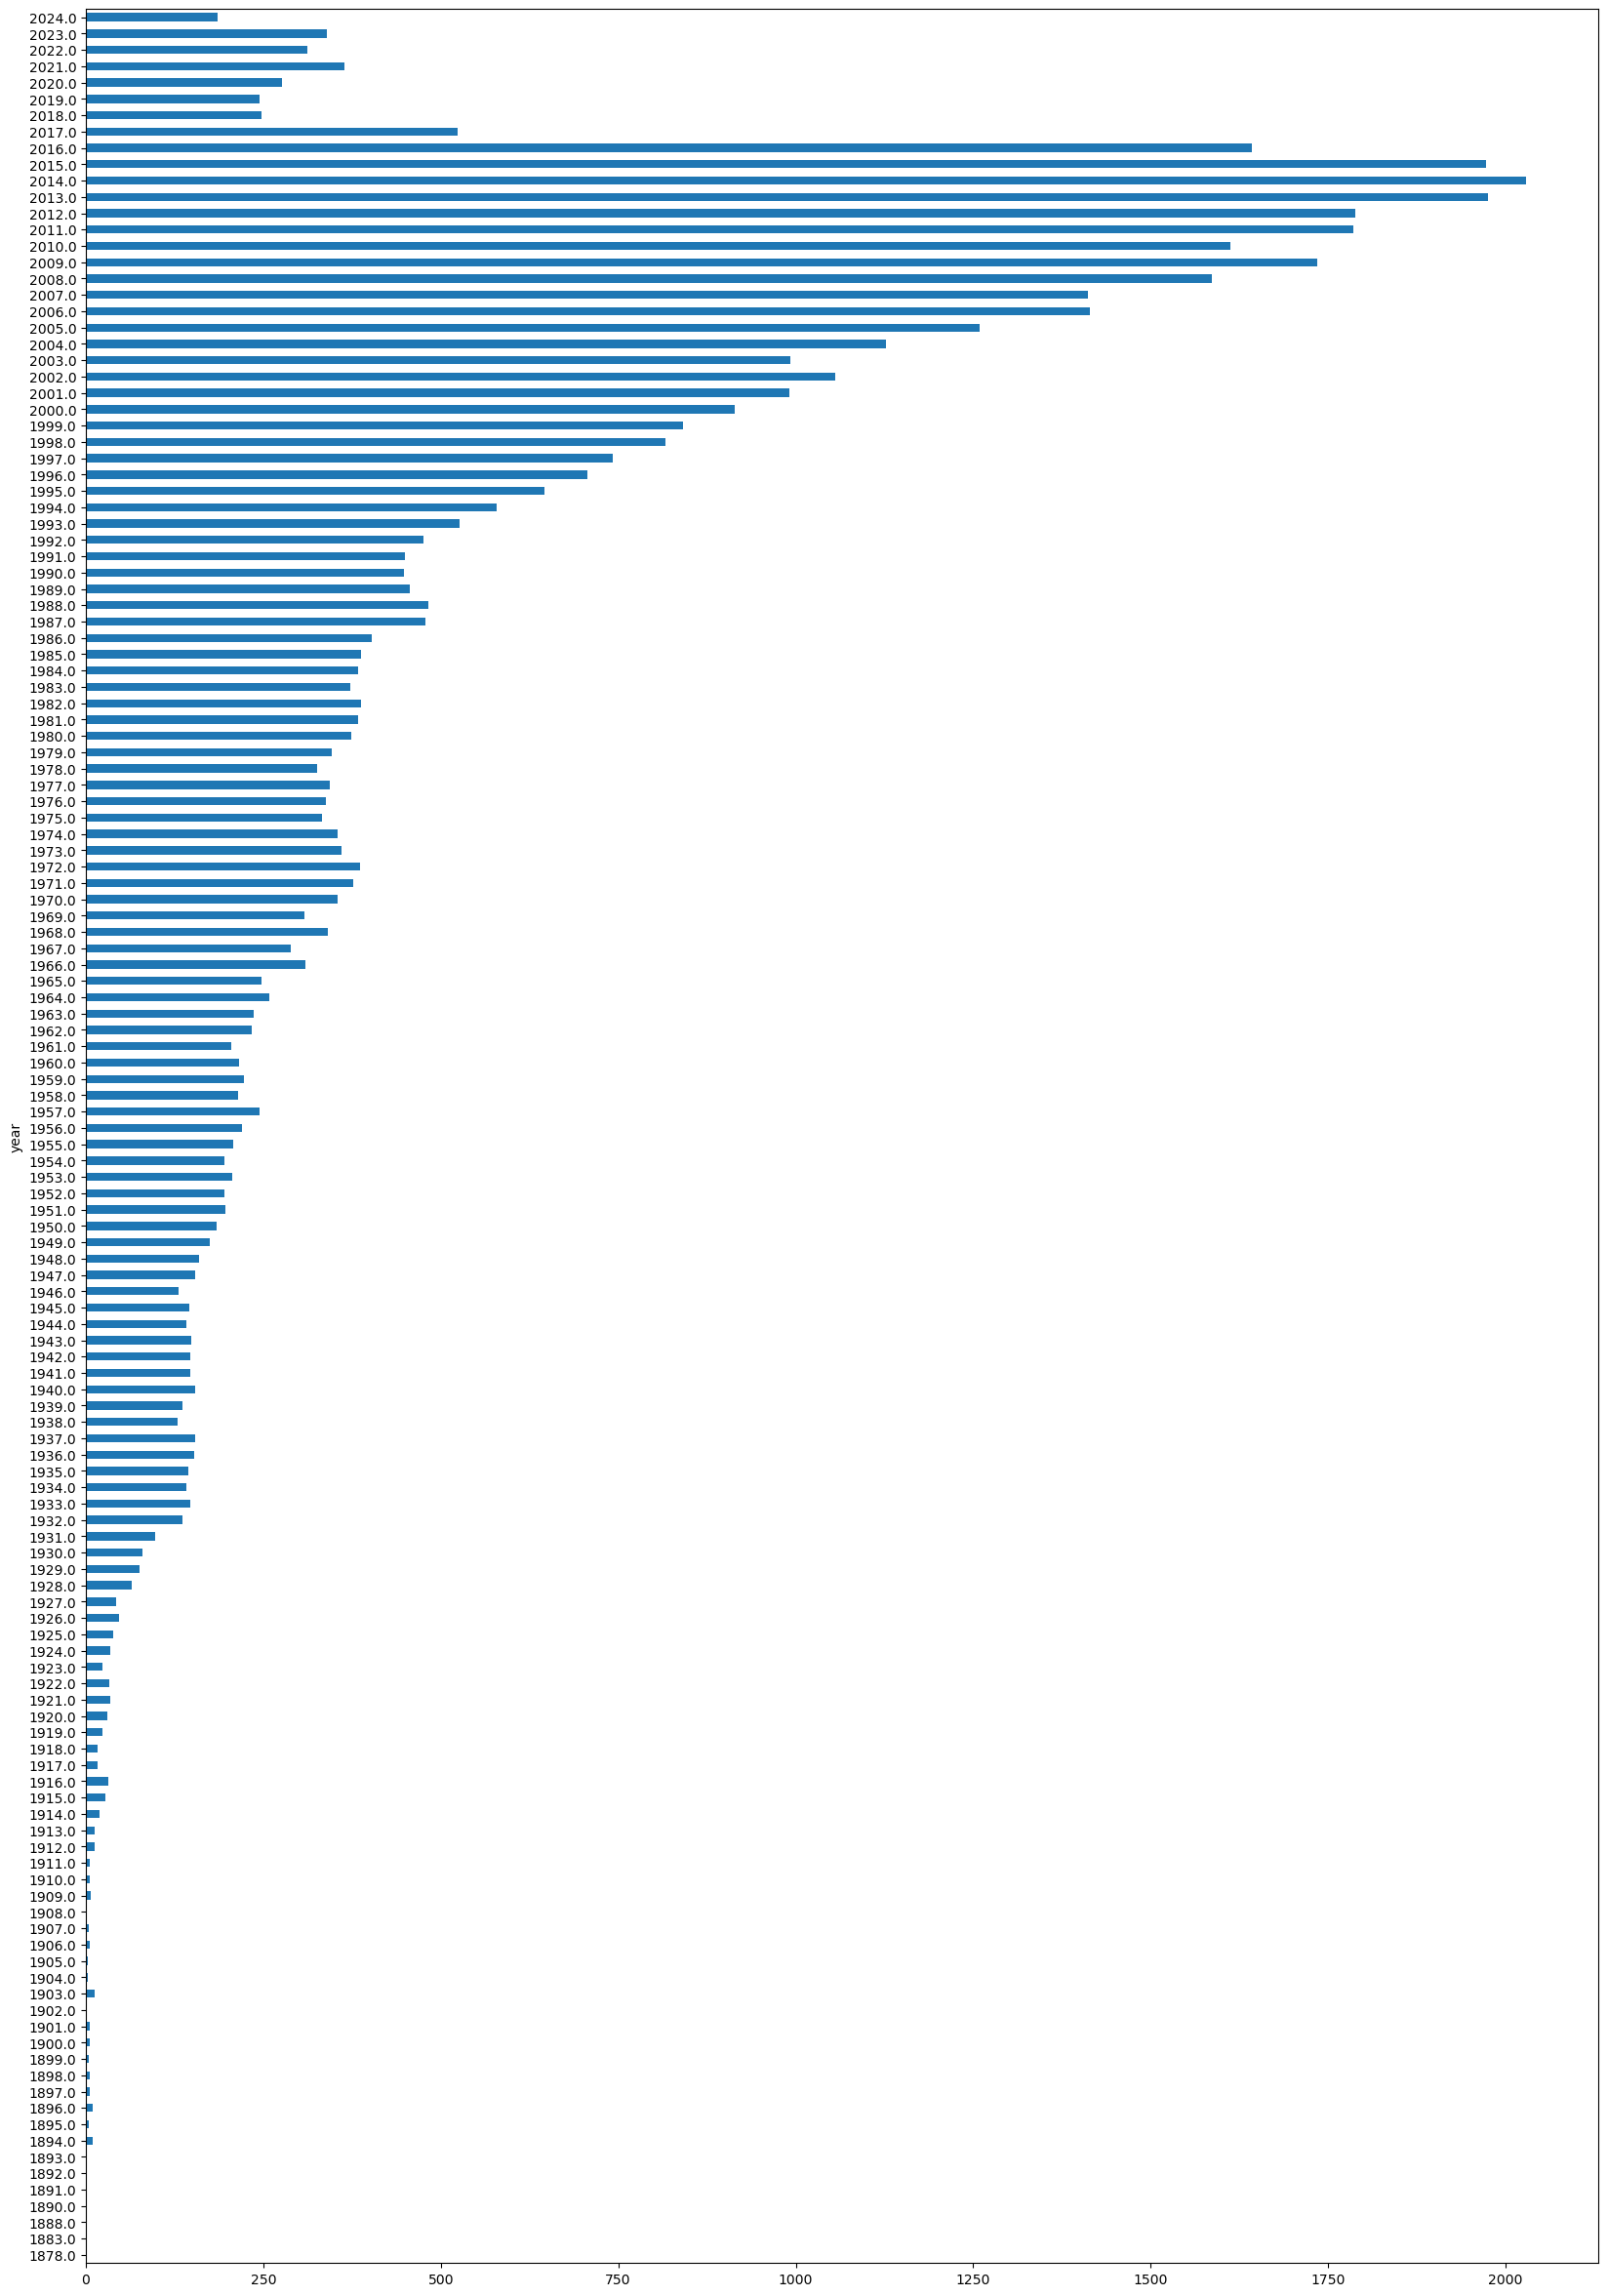

In [3]:
import matplotlib.pyplot as plt
df.year.value_counts().sort_index().plot(kind='barh', figsize=(20, 30))
plt.show()